In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd


import macd
import pandas.io.data as web
import matplotlib.pyplot as plt
import multiprocessing as mp
%matplotlib inline

In [2]:
filename='/home/ruslan/data/snp500.h5'
h5 = pd.HDFStore(filename, 'r')
symbols=macd.getSymbols(h5)




In [31]:
path='/home/ruslan/data/dfs.h5'
for y in range(2005,2011):
    s=str(y)+'-01-01'
    e=str(y)+'-12-31'
    print s,e
    df=macd.parallelCumsum(filename, symbols,s,e,procs=1)

    with pd.get_store(path) as store:
        store[str(y)]=df

2005-01-01 2005-12-31
2006-01-01 2006-12-31
2007-01-01 2007-12-31
2008-01-01 2008-12-31
2009-01-01 2009-12-31
2010-01-01 2010-12-31


In [15]:
#path='/home/ruslan/data/dfs.h5'
#start='2011-01-01'
#end=None
#df=macd.parallelCumsum(filename, symbols,start,end,procs=1) 

#with pd.get_store(path) as store:
#    store['2011']=df    

In [32]:
with pd.get_store(path) as store:
    df1=store
    print df1.keys()

['/2005', '/2006', '/2007', '/2008', '/2009', '/2010', '/2011', '/2011-2015', '/2012', '/2013', '/2013-2015', '/2014', '/2015']


In [34]:
with pd.get_store(path) as store:
    df1=store['/2011-2015']
    print df1.keys()

Index([u'buyhold', u'meanpct', u'ntrades', u'rmsepct', u'strategy', u'sym',
       u'totwinpct', u'win'],
      dtype='object')


In [38]:
print df1.loc[(df1['win']>70.0)]

       buyhold     meanpct  ntrades    rmsepct   strategy   sym   totwinpct  \
FCX   0.142656   57.016779       91  56.145900   2.109164   FCX  269.361401   
NEM   0.344926   65.616708       93  69.649241   2.763090   NEM  208.077616   
CNX   0.143711   58.664689      106  54.497398   1.112848   CNX  204.687502   
FFIV  0.726271  117.911072       85  47.395562   5.348628  FFIV  199.667196   
STX   2.888369  110.203404       76  54.204418  19.289456   STX  189.886665   
RIG   0.220771   61.443346       98  65.256265   1.209258   RIG  170.063733   
DO    0.393155   53.374581       88  32.100082   1.428251    DO  129.000161   
APA   0.373355   49.592256       97  36.678080   1.257025   APA  121.397399   
LUK   0.597938   61.859416       95  32.214428   1.976446   LUK  119.556929   
ILMN  2.717128   87.898198       90  50.424605   8.707046  ILMN  116.455713   
GME   1.500981   29.398627       92  20.396910   4.599131   GME  111.974844   
NTAP  0.529139   77.828101      120  31.782470   1.3

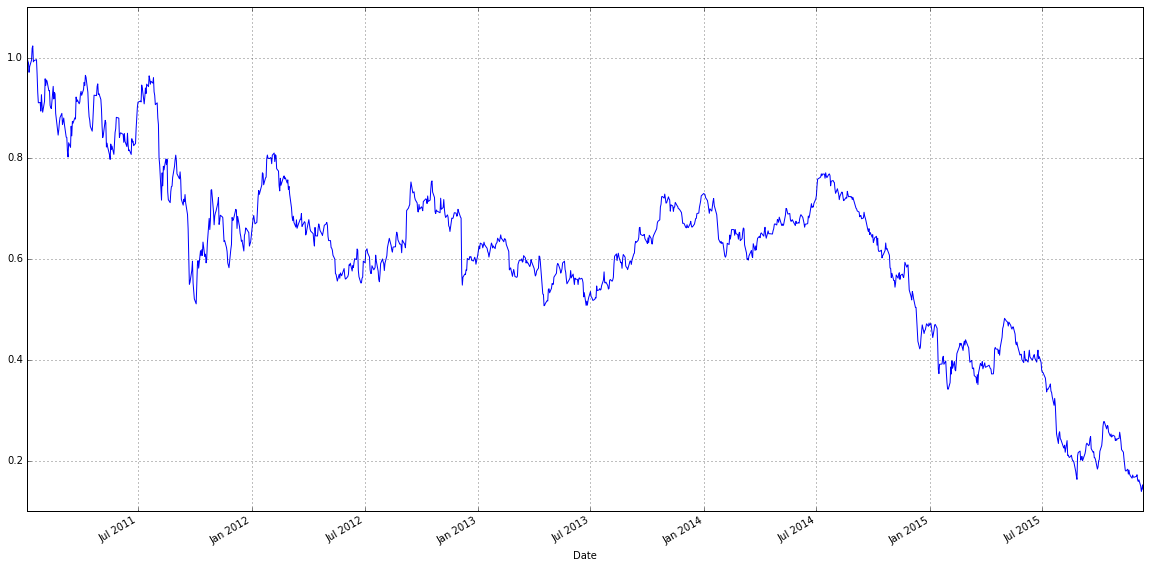

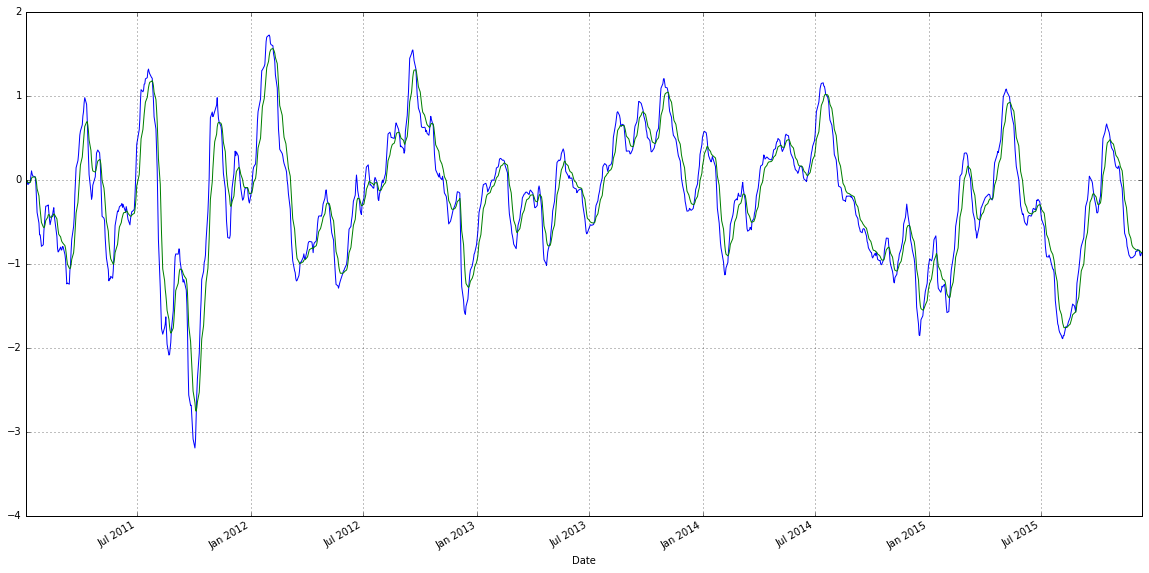

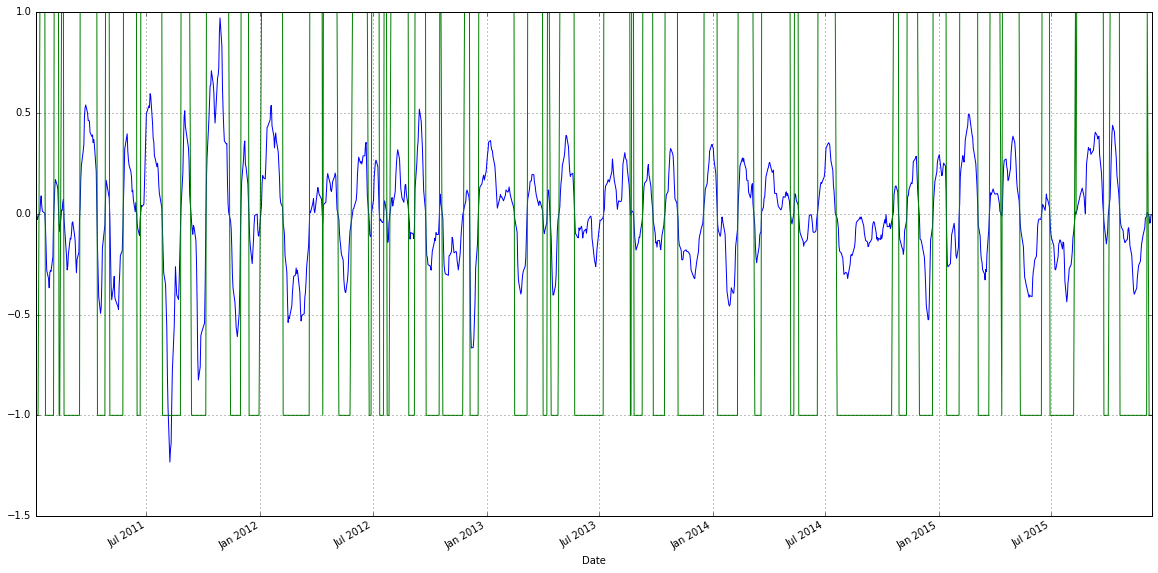

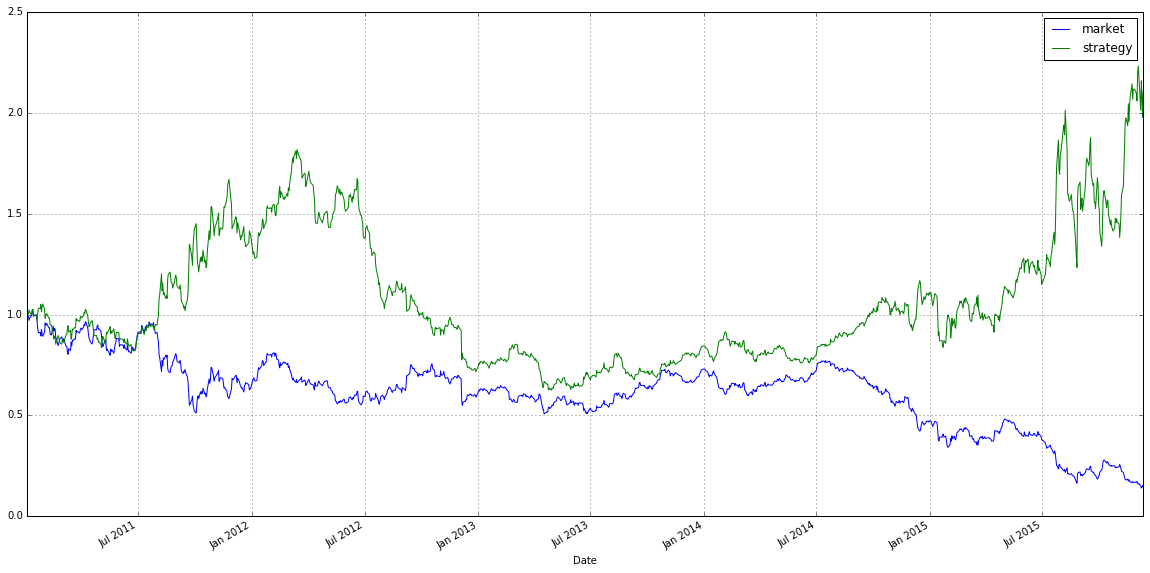

In [47]:
start='2011-01-01'
dt0=macd.getClose(h5,'FCX')[start:]

dt = macd.macd(dt0) 
dcs,res=macd.doCumsum(dt)
macd.plotMacd(dt)

In [40]:
print res

{'totwinpct': 243.12119909309283, 'win': 59.35397039030955, 'rmsepct': 65.890223062756377, 'ntrades': 55, 'strategy': 2.5914918706860544, 'meanpct': 37.63868123840395, 'buyhold': 0.22787039168047199}
